In [1]:
import pandas as pd

In [7]:
data = pd.read_csv("TB_COUNT_GFF_20220211.csv", encoding='utf-8')

In [9]:
data

,STATN_NO,STATN_NM,HO_LN,NMPR_CNT
0,518,가산디지털단지,7호선,359552
1,31,역삼,2호선,312418
2,29,삼성(무역센터),2호선,293268
3,32,강남,2호선,286820
4,12,을지로입구,2호선,270348
5,30,선릉,2호선,252969
6,21,성수,2호선,251746
7,42,구로디지털단지,2호선,232448
8,409,광화문(세종문화회관),5호선,225016
9,84,양재(서초구청),3호선,217584


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

In [16]:
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

In [22]:
stops = []
for i in set(data["STATN_NM"]):
    stops.append(i)
stops

['선릉',
 '양재(서초구청)',
 '가산디지털단지',
 '삼성(무역센터)',
 '성수',
 '구로디지털단지',
 '광화문(세종문화회관)',
 '을지로입구',
 '역삼',
 '강남']

In [21]:
counts = []
for i in set(data["NMPR_CNT"]):
    counts.append(i)
counts

[359552,
 232448,
 312418,
 251746,
 286820,
 252969,
 270348,
 217584,
 293268,
 225016]

In [44]:
subways = {}
sorted_stops = []
sorted_counts = []
for i in range(len(stops)):
    subways[stops[i]] = counts[i]
subways
sorted_subways = sorted(subways.items(), key = lambda item: item[1], reverse = True)

for i in sorted_subways:
    sorted_stops.append(i[0])
    sorted_counts.append(i[1])
sorted_stops
sorted_counts

[359552,
 312418,
 293268,
 286820,
 270348,
 252969,
 251746,
 232448,
 225016,
 217584]

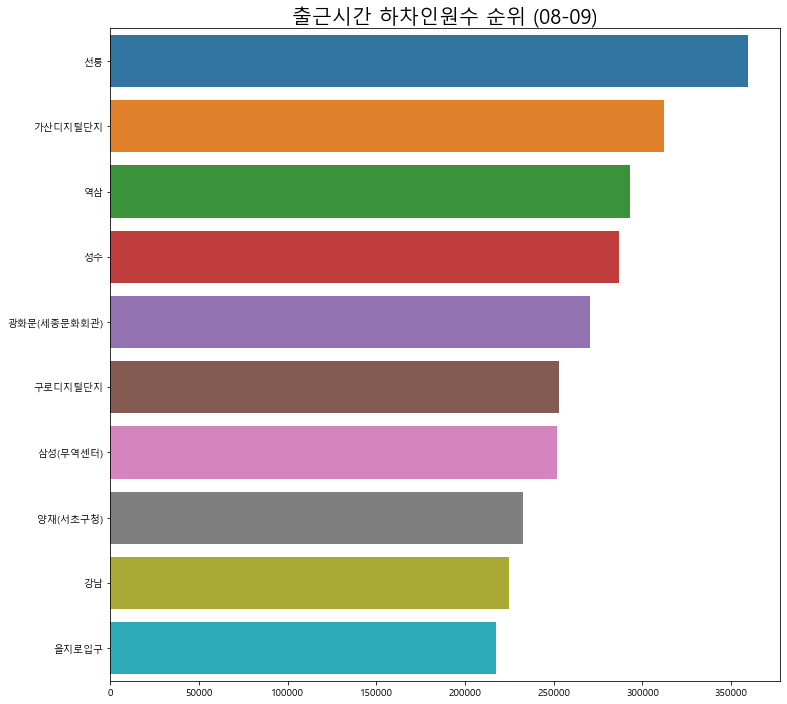

In [47]:
plt.figure(figsize=(12,12))
plt.title("출근시간 하차인원수 순위 (08-09)", fontdict={"fontsize" : 20})
sns.barplot(y=sorted_stops,x=sorted_counts)
plt.savefig("출근시간_하차인원_순위.png")
plt.show()